In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/test.csv')
df2.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


# Step 1: Exploratory Data Analysis

##A. visualize the distribution of *is_duplicate*







id                 0
qid1               0
qid2               0
question1          0
question2          0
is_duplicate       0
q1_len             0
q2_len             0
question1_clean    0
question2_clean    0
dtype: int64
                  id           qid1           qid2   is_duplicate  \
count  404287.000000  404287.000000  404287.000000  404287.000000   
mean   202144.340337  217243.151093  220955.212082       0.369201   
std    116708.673691  157751.614317  159903.168488       0.482589   
min         0.000000       1.000000       2.000000       0.000000   
25%    101071.500000   74436.500000   74726.500000       0.000000   
50%    202145.000000  192181.000000  197053.000000       0.000000   
75%    303216.500000  346573.000000  354692.000000       1.000000   
max    404289.000000  537932.000000  537933.000000       1.000000   

              q1_len         q2_len  
count  404287.000000  404287.000000  
mean       59.536997      60.108507  
std        29.940553      33.863588  
min

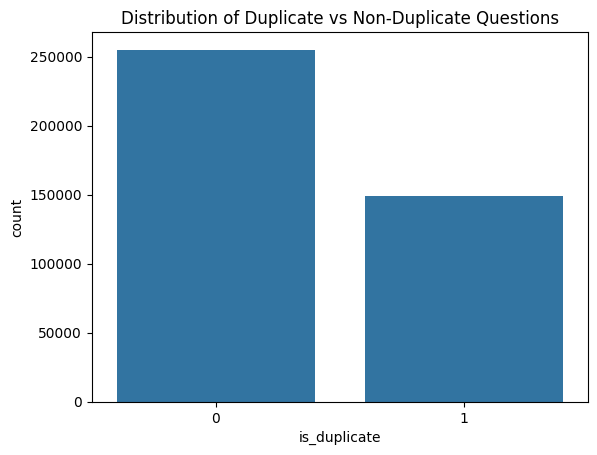

Percentage of duplicate questions: 36.92%


In [ ]:
print(df.isnull().sum())

print(df.describe())

sns.countplot(x=df["is_duplicate"])
plt.title("Distribution of Duplicate vs Non-Duplicate Questions")
plt.show()

duplicate_percentage = df["is_duplicate"].mean() * 100
print(f"Percentage of duplicate questions: {duplicate_percentage:.2f}%")



# B. 1. Analyze the Text Columns (*question1* and *question2*) using word clouds to visualize common words





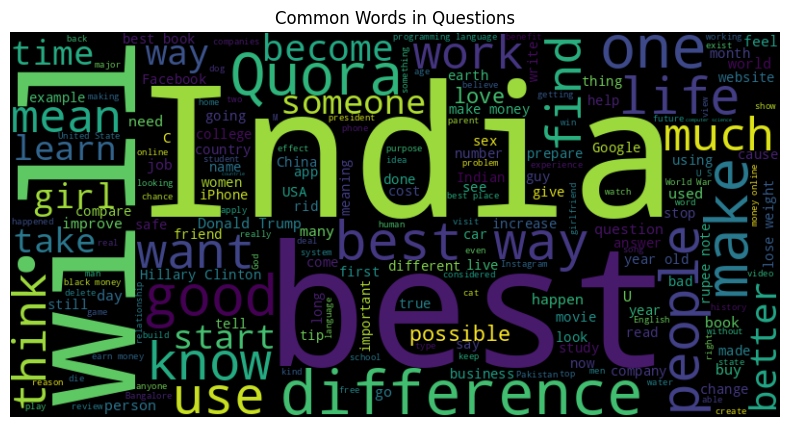

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(
    ' '.join(df['question1'].astype(str) + " " + df['question2'].astype(str))
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Questions")
plt.show()


# B.1. The below code cleans and tokenizes text from two columns (question1 and question2) in a DataFrame, removing stopwords and punctuation. Then, it counts the most common words across both columns and prints the top 20 frequent words as a DataFrame. This is to show numerical representation of the wordclouds by taking the stopwords from wordcloud





In [ ]:
from wordcloud import STOPWORDS
import string
from collections import Counter
import pandas as pd
import itertools

stopwords = set(STOPWORDS)

def clean_text(text):
    if not isinstance(text, str): return []
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    return [word for word in text.split() if word not in stopwords]

df['q1_clean'] = df['question1'].map(clean_text)
df['q2_clean'] = df['question2'].map(clean_text)

all_words = list(itertools.chain.from_iterable(df['q1_clean'])) + list(itertools.chain.from_iterable(df['q2_clean']))


word_counts = Counter(all_words)

common_word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

print(common_word_freq_df)


          Word  Frequency
0         best      70489
1        india      28694
2         will      28160
3       people      26064
4         good      24761
5          one      19333
6         make      18163
7          way      18048
8        quora      17995
9         life      15537
10       money      14545
11        time      14301
12        know      13747
13  difference      13381
14       learn      13008
15       whats      12601
16         new      12405
17        much      12366
18         use      12344
19       think      11495


# B.1. The below code visualizes the top 20 most frequent words using a bar plot with Seaborn and Matplotlib.

<ipython-input-7-71820a8cdf5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_word_freq_df['Word'][:20], y=common_word_freq_df['Frequency'][:20], palette="viridis")


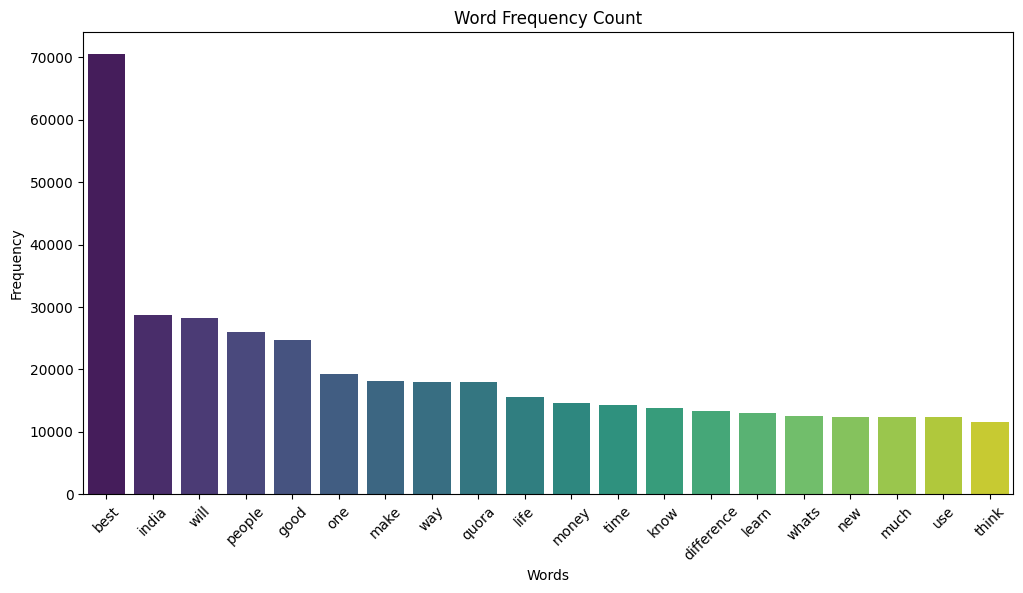

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=common_word_freq_df['Word'][:20], y=common_word_freq_df['Frequency'][:20], palette="viridis")
plt.xticks(rotation=45)
plt.title("Word Frequency Count")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


# B.2 This code calculates the lengths of two question columns and visualizes their distribution using a histogram with KDE.



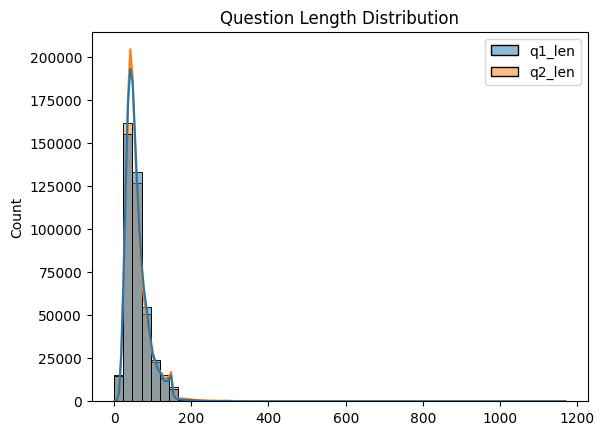

In [ ]:
df['q1_len'] = df['question1'].astype(str).apply(len)
df['q2_len'] = df['question2'].astype(str).apply(len)

sns.histplot(df[['q1_len', 'q2_len']], bins=50, kde=True)
plt.title("Question Length Distribution")
plt.show()


In [ ]:
df2['q1_len'] = df2['question1'].astype(str).apply(len)
df2['q2_len'] = df2['question2'].astype(str).apply(len)

# B.2. This code computes and displays statistics on the length of two question columns, then visualizes their distributions and length differences using histograms.

Statistics for Question 1 Length:
 count    404290.000000
mean         59.536716
std          29.940641
min           1.000000
25%          39.000000
50%          52.000000
75%          72.000000
max         623.000000
Name: q1_len, dtype: float64

Statistics for Question 2 Length:
 count    404290.000000
mean         60.108380
std          33.863845
min           1.000000
25%          39.000000
50%          51.000000
75%          72.000000
max        1169.000000
Name: q2_len, dtype: float64

Statistics for Length Difference:
 count    404290.000000
mean         20.158179
std          25.584401
min           0.000000
25%           4.000000
50%          12.000000
75%          26.000000
max        1080.000000
Name: len_diff, dtype: float64


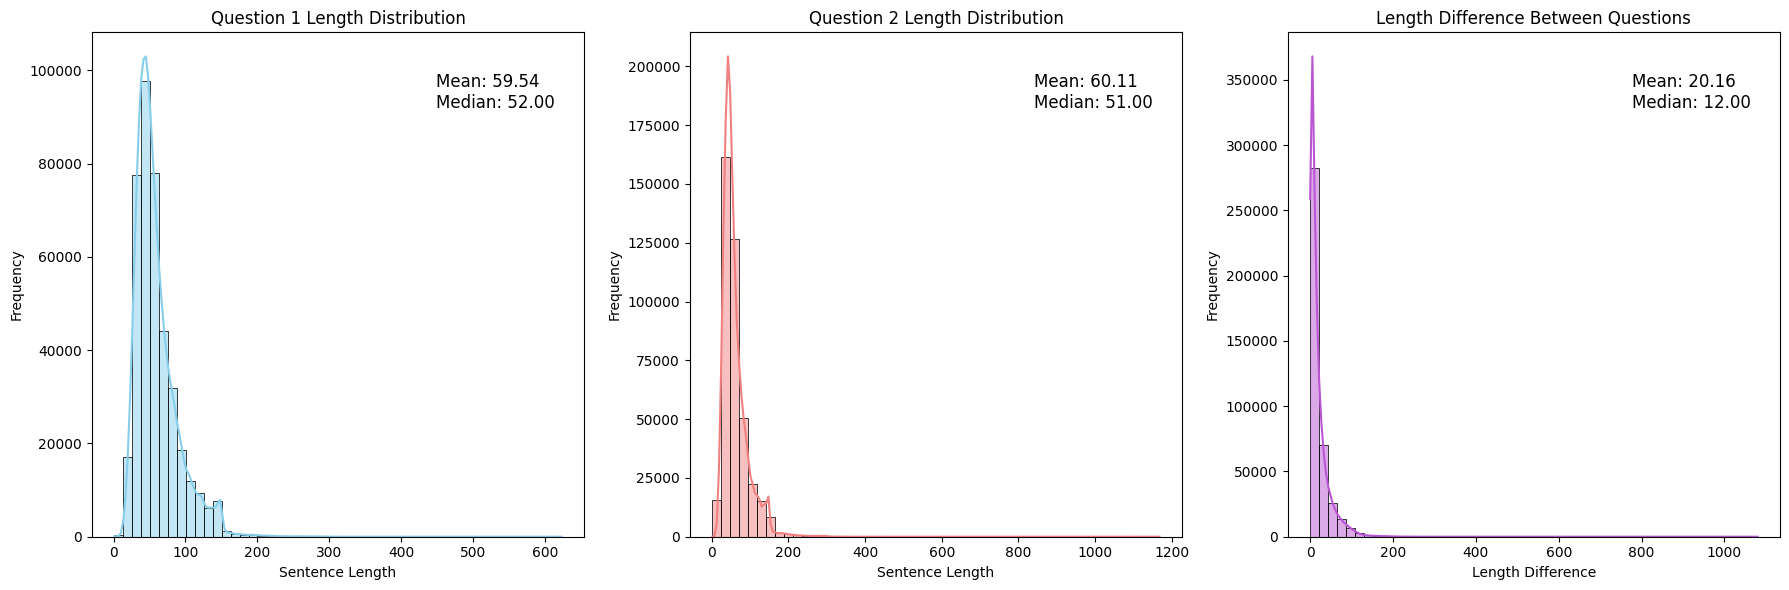

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df['q1_len'] = df['question1'].astype(str).apply(len)
df['q2_len'] = df['question2'].astype(str).apply(len)
df['len_diff'] = abs(df['q1_len'] - df['q2_len'])

q1_stats = df['q1_len'].describe()
q2_stats = df['q2_len'].describe()
len_diff_stats = df['len_diff'].describe()


print("Statistics for Question 1 Length:\n", q1_stats)
print("\nStatistics for Question 2 Length:\n", q2_stats)
print("\nStatistics for Length Difference:\n", len_diff_stats)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


sns.histplot(df['q1_len'], bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Question 1 Length Distribution")
axes[0].set_xlabel("Sentence Length")
axes[0].set_ylabel("Frequency")
axes[0].annotate(f"Mean: {q1_stats['mean']:.2f}\nMedian: {np.median(df['q1_len']):.2f}",
                 xy=(0.7, 0.85), xycoords="axes fraction", fontsize=12, color='black')

sns.histplot(df['q2_len'], bins=50, kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title("Question 2 Length Distribution")
axes[1].set_xlabel("Sentence Length")
axes[1].set_ylabel("Frequency")
axes[1].annotate(f"Mean: {q2_stats['mean']:.2f}\nMedian: {np.median(df['q2_len']):.2f}",
                 xy=(0.7, 0.85), xycoords="axes fraction", fontsize=12, color='black')

sns.histplot(df['len_diff'], bins=50, kde=True, color='mediumorchid', ax=axes[2])
axes[2].set_title("Length Difference Between Questions")
axes[2].set_xlabel("Length Difference")
axes[2].set_ylabel("Frequency")
axes[2].annotate(f"Mean: {len_diff_stats['mean']:.2f}\nMedian: {np.median(df['len_diff']):.2f}",
                 xy=(0.7, 0.85), xycoords="axes fraction", fontsize=12, color='black')


plt.tight_layout()
plt.show()




# B.3 This code calculates the number of common words between two questions and visualizes their distribution using a histogram.


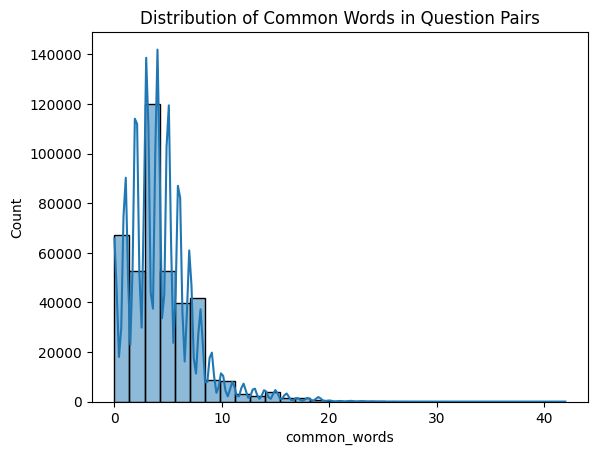

In [ ]:
df['common_words'] = df.apply(lambda row: len(set(str(row['question1']).split()) & set(str(row['question2']).split())), axis=1)

sns.histplot(df['common_words'], bins=30, kde=True)
plt.title("Distribution of Common Words in Question Pairs")
plt.show()


In [ ]:
df2['q1_clean'] = df2['question1'].map(clean_text)
df2['q2_clean'] = df2['question2'].map(clean_text)

#B.3. Below code Calculate common words between the two questions in each pair, Create a list of all common words across all pairs, Count the frequency of common words

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


df['common_words_list'] = df.apply(lambda row: list(set(str(row['question1']).split()) & set(str(row['question2']).split())), axis=1)

all_common_words = []
for common_words in df['common_words_list']:
    all_common_words.extend(common_words)

common_word_counts = Counter(all_common_words)
top_common_words = common_word_counts.most_common(10)


df['common_words'] = df['common_words_list'].apply(lambda words: ', '.join(words) if words else 'No common words')


print("Top 10 Common Words and their Frequency:")
for word, count in top_common_words:
    print(f"{word}: {count}")

print("\nFirst few rows of the 'common_words' column:")
print(df[['question1', 'question2', 'common_words']].head())



Top 10 Common Words and their Frequency:
the: 95075
What: 93344
How: 60911
is: 52939
I: 50382
in: 48267
a: 44019
to: 43740
of: 34911
are: 32276

First few rows of the 'common_words' column:
                                           question1  \
0  What is the step by step guide to invest in sh...   
1  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2  How can I increase the speed of my internet co...   
3  Why am I mentally very lonely? How can I solve...   
4  Which one dissolve in water quikly sugar, salt...   

                                           question2  \
0  What is the step by step guide to invest in sh...   
1  What would happen if the Indian government sto...   
2  How can Internet speed be increased by hacking...   
3  Find the remainder when [math]23^{24}[/math] i...   
4            Which fish would survive in salt water?   

                                        common_words  
0  step, to, is, in, guide, share, What, by, the,...  
1                  the, (K

# C. check for missing value or outliers using boxplot



id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
q1_len          0
q2_len          0
dtype: int64


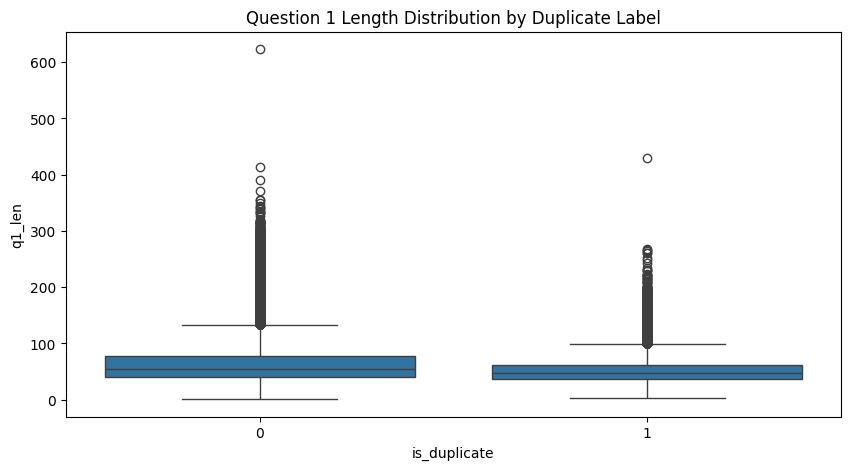

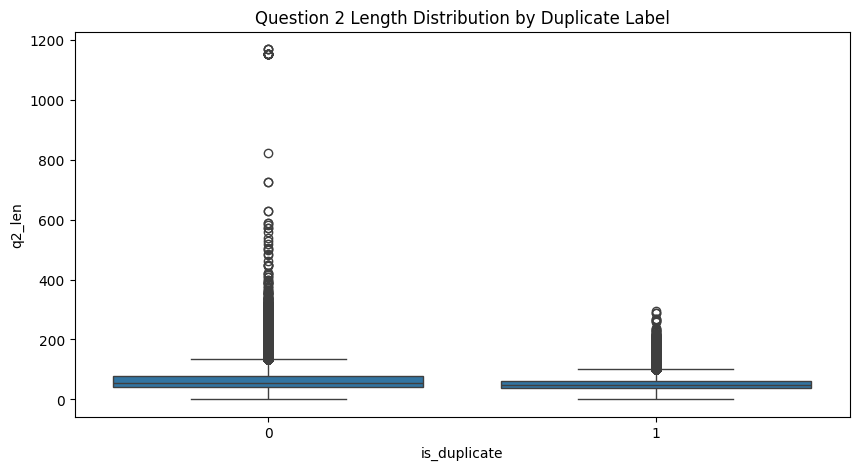

In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)


plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_duplicate'], y=df['q1_len'])
plt.title("Question 1 Length Distribution by Duplicate Label")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_duplicate'], y=df['q2_len'])
plt.title("Question 2 Length Distribution by Duplicate Label")
plt.show()


In [ ]:
print(df2.isnull().sum())
df2.dropna(inplace=True)

test_id      0
question1    2
question2    4
q1_clean     0
q2_clean     0
q1_len       0
q2_len       0
dtype: int64


# D. Feature correlation



# This code calculates question lengths and character counts (which are redundant), computes their correlation with the duplicate label, and visualizes the correlations using a heatmap.

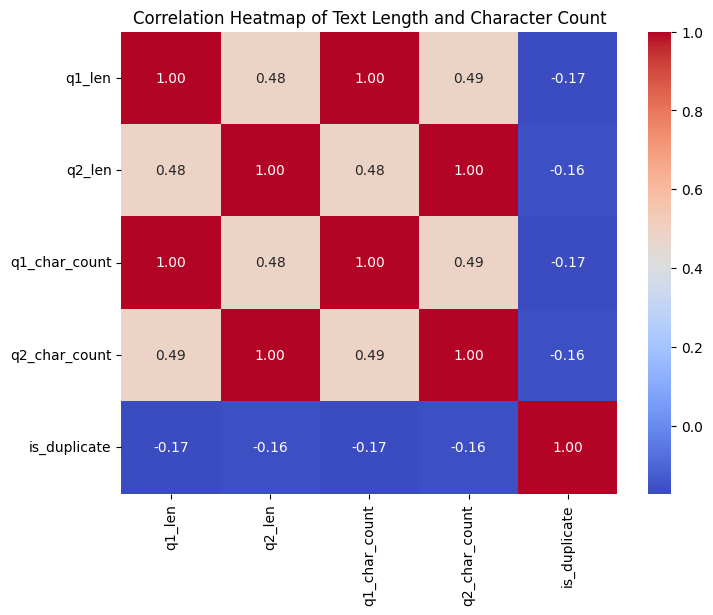

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

df['q1_len'] = df['question1'].astype(str).apply(len)
df['q2_len'] = df['question2'].astype(str).apply(len)
df['q1_char_count'] = df['question1'].astype(str).apply(lambda x: len(x.replace(" ", "")))
df['q2_char_count'] = df['question2'].astype(str).apply(lambda x: len(x.replace(" ", "")))

corr_matrix = df[['q1_len', 'q2_len', 'q1_char_count', 'q2_char_count', 'is_duplicate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Text Length and Character Count")
plt.show()


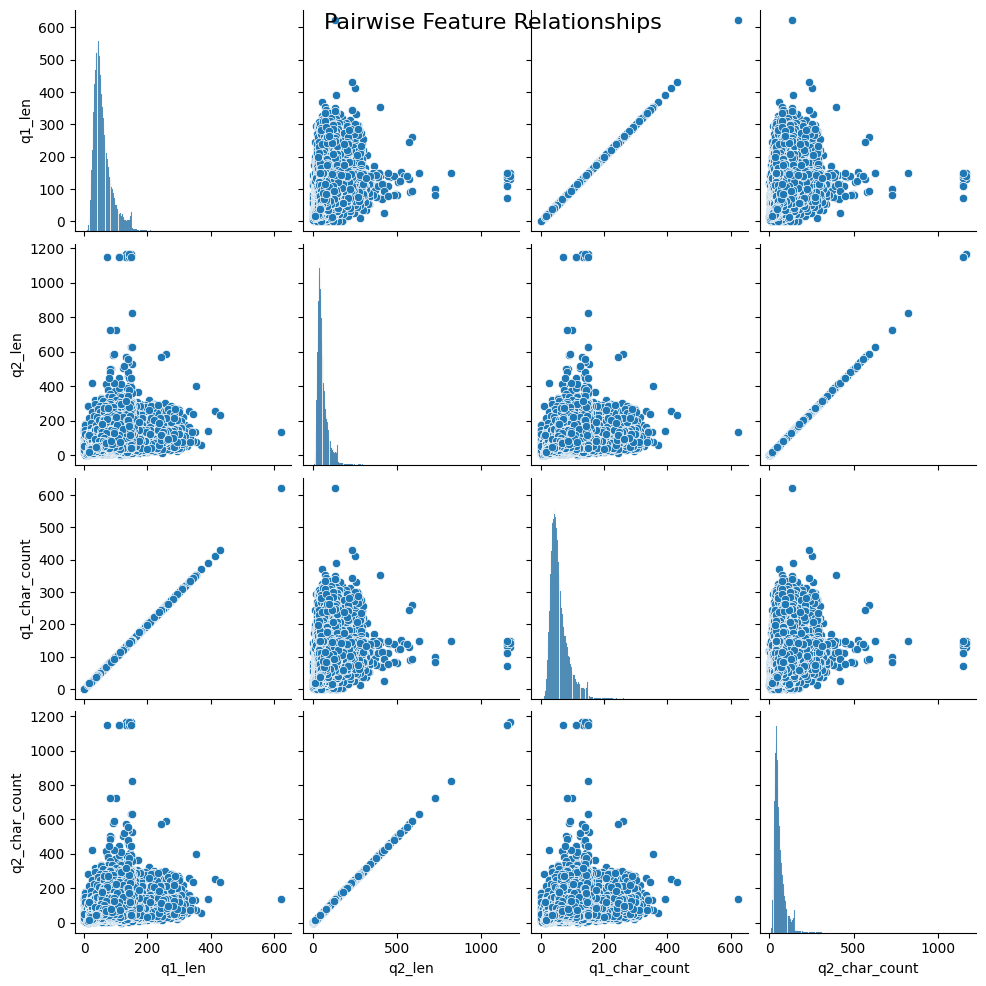

In [ ]:
sns.pairplot(df[['q1_len', 'q2_len', 'q1_char_count', 'q2_char_count']])
plt.suptitle("Pairwise Feature Relationships", size=16)
plt.show()


# Step 2
# This code cleans text data by removing numbers, punctuation, stopwords, and lowercase, lemmatizing words. It then applies TF-IDF vectorization to combine the cleaned questions into a single matrix of the top 5000 features.

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['question1_clean'] = df['question1'].apply(clean_text)
df['question2_clean'] = df['question2'].apply(clean_text)

tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['question1_clean'] + " " + df['question2_clean'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Cleaning the test data set

In [ ]:
df2['question1_clean'] = df2['question1'].apply(clean_text)
df2['question2_clean'] = df2['question2'].apply(clean_text)

# Step 3 : Model Creation (Siamese)


# This code builds and trains a Siamese network for text similarity, using shared LSTM layers to process two input questions, and predicts their likelihood of being duplicates. It tokenizes and pads the text, applies an embedding layer, and uses a dense layer for the final binary classification output.



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Dropout, Lambda
from tensorflow.keras.models import Model
import xgboost as xgb
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['question1_clean'] + " " + df['question2_clean'])

sequences1 = tokenizer.texts_to_sequences(df['question1_clean'])
sequences2 = tokenizer.texts_to_sequences(df['question2_clean'])

X1 = pad_sequences(sequences1, maxlen=30)
X2 = pad_sequences(sequences2, maxlen=30)
y = df['is_duplicate']

# Siamese Network Model
input_1 = Input(shape=(30,))
input_2 = Input(shape=(30,))

embedding = Embedding(input_dim=10000, output_dim=128, input_length=30)
shared_lstm = LSTM(64)

encoded_1 = shared_lstm(embedding(input_1))
encoded_2 = shared_lstm(embedding(input_2))

merged = tf.keras.layers.concatenate([encoded_1, encoded_2])
dense = Dense(64, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(dense)

model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train Model
model.fit([X1, X2], y, epochs=5, batch_size=512, validation_split=0.2)



Epoch 1/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 539s 841ms/step - accuracy: 0.7111 - loss: 0.5606 - val_accuracy: 0.7729 - val_loss: 0.4713
Epoch 2/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 568s 850ms/step - accuracy: 0.7907 - loss: 0.4391 - val_accuracy: 0.7889 - val_loss: 0.4453
Epoch 3/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 560s 847ms/step - accuracy: 0.8223 - loss: 0.3837 - val_accuracy: 0.7981 - val_loss: 0.4336
Epoch 4/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 557s 839ms/step - accuracy: 0.8436 - loss: 0.3447 - val_accuracy: 0.7996 - val_loss: 0.4313
Epoch 5/5
632/632 ━━━━━━━━━━━━━━━━━━━━ 556s 830ms/step - accuracy: 0.8616 - loss: 0.3096 - val_accuracy: 0.8027 - val_loss: 0.4403


In [ ]:
!pip install tensorflow as tf
!pip install scikeras
!pip install keras-tuner

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


# Preprocess the test data set as we will have to predict from this data set

In [ ]:

test_sequences1 = tokenizer.texts_to_sequences(df2['question1_clean'])
test_sequences2 = tokenizer.texts_to_sequences(df2['question2_clean'])

X_test1 = pad_sequences(test_sequences1, maxlen=30)
X_test2 = pad_sequences(test_sequences2, maxlen=30)



# Step 4: Model Evaluation
# This code evaluates the trained Siamese LSTM model by calculating accuracy, precision, recall, F1-score, and AUC-ROC, then visualizes performance using a confusion matrix and an ROC curve.


12634/12634 ━━━━━━━━━━━━━━━━━━━━ 393s 31ms/step
Accuracy: 0.8705004118361461
Precision: 0.8127638424497489
Recall: 0.8435781137991331
F1-score: 0.8278843466969115
AUC-ROC: 0.8649179388871442


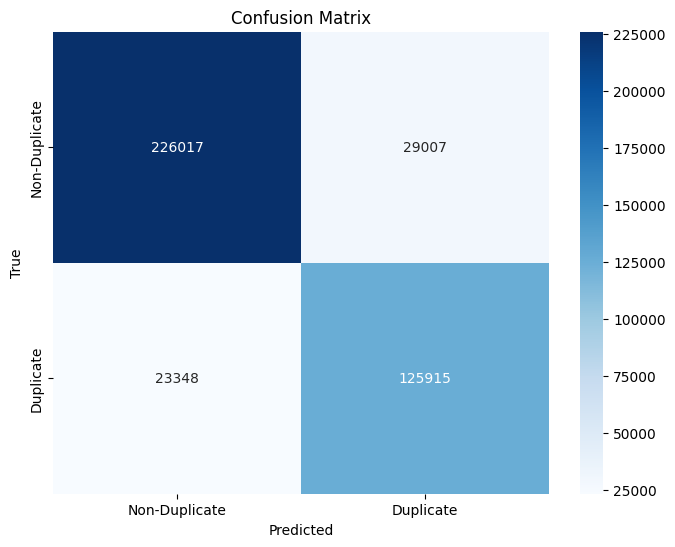

12634/12634 ━━━━━━━━━━━━━━━━━━━━ 395s 31ms/step


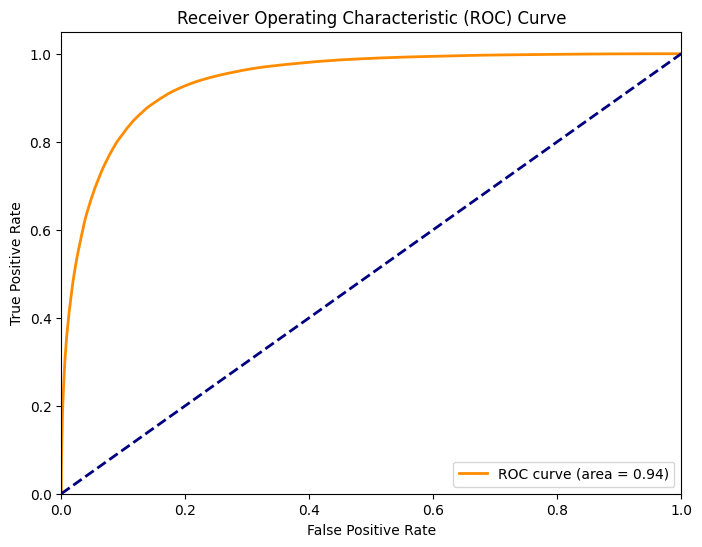

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = (model.predict([X1, X2]) > 0.5).astype("int32")


accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


cm = confusion_matrix(y, y_pred)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Duplicate", "Duplicate"], yticklabels=["Non-Duplicate", "Duplicate"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y, model.predict([X1, X2]))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


# Step 5: Fine tuning and hyperperameter optimization

## This code tunes hyperparameters for a Bidirectional LSTM Siamese Network using Keras Tuner's Hyperband. It optimizes LSTM units (64, 128, 256), dropout rate (0.2, 0.3, 0.5), dense layer units (64, 128, 256), and learning rate (1e-3, 5e-4, 1e-4). After tuning, it trains the best model and evaluates performance.



Trial 10 Complete [00h 01m 55s]
val_accuracy: 0.6434999704360962

Best val_accuracy So Far: 0.7055000066757202
Total elapsed time: 00h 29m 18s
Epoch 1/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 460s 706ms/step - accuracy: 0.7383 - loss: 0.5241 - val_accuracy: 0.7794 - val_loss: 0.4801
Epoch 2/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 449s 710ms/step - accuracy: 0.7984 - loss: 0.4252 - val_accuracy: 0.7908 - val_loss: 0.4489
Epoch 3/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 444s 702ms/step - accuracy: 0.8210 - loss: 0.3830 - val_accuracy: 0.7773 - val_loss: 0.4596
Epoch 4/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 509s 714ms/step - accuracy: 0.8368 - loss: 0.3536 - val_accuracy: 0.8048 - val_loss: 0.4206
Epoch 5/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 501s 712ms/step - accuracy: 0.8469 - loss: 0.3316 - val_accuracy: 0.8013 - val_loss: 0.4387
Epoch 6/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 494s 700ms/step - accuracy: 0.8577 - loss: 0.3103 - val_accuracy: 0.8119 - val_loss: 0.4498
Epoch 7/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 445s 704ms/step - accurac

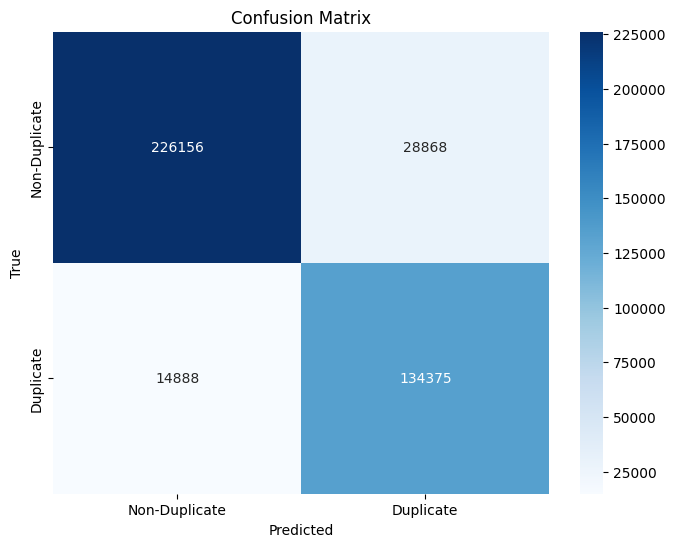

12634/12634 ━━━━━━━━━━━━━━━━━━━━ 299s 24ms/step


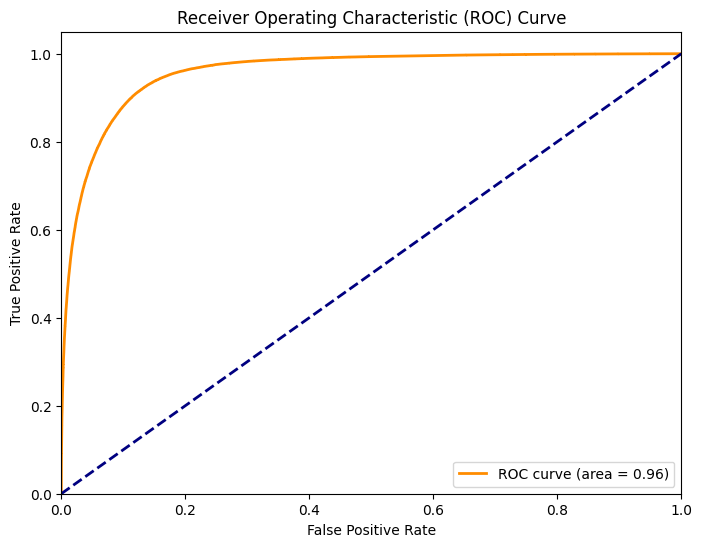

In [ ]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


def build_model(hp):
    input_1 = Input(shape=(30,))
    input_2 = Input(shape=(30,))

    embedding = Embedding(input_dim=10000, output_dim=128, input_length=30)

    shared_lstm = Bidirectional(LSTM(hp.Choice('units', values=[64, 128, 256]), return_sequences=False))

    encoded_1 = shared_lstm(embedding(input_1))
    encoded_2 = shared_lstm(embedding(input_2))

    merged = tf.keras.layers.concatenate([encoded_1, encoded_2])

    merged = BatchNormalization()(merged)
    merged = Dropout(hp.Choice('dropout_rate', values=[0.2, 0.3, 0.5]))(merged)

    dense_units = hp.Choice('dense_units', values=[64, 128, 256])
    dense = Dense(dense_units, activation='relu')(merged)
    dense = Dropout(0.3)(dense)

    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[input_1, input_2], outputs=output)

    learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])

    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory='hyperband_tuning',
    project_name='siamese_lstm'
)

tuner.search([X1[:10000], X2[:10000]], y[:10000], epochs=5, batch_size=256, validation_split=0.2)


best_model = tuner.get_best_models(num_models=1)[0]


best_model.fit([X1, X2], y, epochs=10, batch_size=512, validation_split=0.2)


y_pred = (best_model.predict([X1, X2]) > 0.5).astype("int32")


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

# confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Duplicate", "Duplicate"], yticklabels=["Non-Duplicate", "Duplicate"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y, best_model.predict([X1, X2]))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from keras.optimizers import Adam
from keras.layers import LSTM, Dropout
from keras.models import Model
import random

# Try different hyperparameters
best_f1 = 0
best_params = {}

for _ in range(5):  # Try 5 different combinations
    lstm_units = random.choice([32, 64, 128])  # Varying LSTM sizes
    dropout_rate = random.choice([0.2, 0.3, 0.5])  # Different dropout rates
    learning_rate = random.choice([0.01, 0.001, 0.0005])  # Vary learning rate
    batch_size = random.choice([256, 512, 1024])  # Try different batch sizes

    # Build model
    shared_lstm = LSTM(lstm_units, return_sequences=False)
    encoded_1 = shared_lstm(embedding(input_1))
    encoded_2 = shared_lstm(embedding(input_2))
    merged = tf.keras.layers.concatenate([encoded_1, encoded_2])
    dense = Dense(64, activation='relu')(merged)
    dropout = Dropout(dropout_rate)(dense)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=[input_1, input_2], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

    # Train model
    model.fit([X1, X2], y, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate model
    y_probs = model.predict([X1, X2])
    y_pred = (y_probs > 0.5).astype("int32")
    f1 = f1_score(y, y_pred)

    # Store best parameters
    if f1 > best_f1:
        best_f1 = f1
        best_params = {'LSTM Units': lstm_units, 'Dropout': dropout_rate, 'Learning Rate': learning_rate, 'Batch Size': batch_size}

print("Best Hyperparameters:", best_params)
print("Best F1-score:", best_f1)


12634/12634 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step
12634/12634 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step
12634/12634 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step
12634/12634 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step
12634/12634 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step
Best Hyperparameters: {'LSTM Units': 128, 'Dropout': 0.2, 'Learning Rate': 0.0005, 'Batch Size': 256}
Best F1-score: 0.8396767159774903


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import RandomizedSearchCV


from scikeras.wrappers import KerasClassifier   # Change from tensorflow.keras.wrappers
import keras_tuner as kt
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define a function to build the model with hyperparameters
def build_model(hp):
    input_1 = Input(shape=(30,))
    input_2 = Input(shape=(30,))

    # Define embedding layer
    embedding = Embedding(input_dim=10000, output_dim=128, input_length=30)

    # Define LSTM with tunable units
    shared_lstm = LSTM(hp.Int('units', min_value=32, max_value=128, step=32))

    encoded_1 = shared_lstm(embedding(input_1))
    encoded_2 = shared_lstm(embedding(input_2))

    # Merge the two encoded sequences
    merged = tf.keras.layers.concatenate([encoded_1, encoded_2])

    # Add dense layers with tunable units and activation
    dense = Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(merged)

    # Output layer
    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[input_1, input_2], outputs=output)

    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize KerasTuner's Hyperband
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',  # The metric to optimize
    max_epochs=5,  # Number of epochs for each trial
    factor=3,  # Reduces the number of trials in each iteration
    hyperband_iterations=1,  # Number of Hyperband iterations
    directory='kt_dir',  # Directory to save the results
    project_name='siamese_model_tuning'
)

# Tune the model
tuner.search([X1, X2], y, epochs=5, batch_size=512, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
best_model.evaluate([X1, X2], y)




Trial 10 Complete [00h 01m 25s]
val_accuracy: 0.7893714904785156

Best val_accuracy So Far: 0.8170867562294006
Total elapsed time: 00h 09m 24s
12634/12634 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - accuracy: 0.9090 - loss: 0.2241


[0.2633122205734253, 0.8918565511703491]

# Predicting with the best model by the test dataset after creating, training and fine tuning the model using training dataset.

In [ ]:
y_test_pred_prob = best_model.predict([X_test1, X_test2])

y_test_pred = (y_test_pred_prob > 0.5).astype("int32")


73306/73306 ━━━━━━━━━━━━━━━━━━━━ 1774s 24ms/step


# Creating the submission csv file after classifying pairs of questions as either "duplicate"  or "not duplicate" based on the provided training dataset on test dataset with test id.


In [ ]:
submission_df = pd.DataFrame({
    "test_id": df2.index,
    "is_duplicate": y_test_pred.flatten()
})


In [ ]:
submission_df.to_csv("submission.csv", index=False)


In [ ]:
print(submission_df.head())


   test_id  is_duplicate
0        0             0
1        1             0
2        2             1
3        3             0
4        4             1


In [ ]:
df2.head()

,test_id,question1,question2,q1_clean,q2_clean,q1_len,q2_len,question1_clean,question2_clean
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,surface pro compare ipad pro,microsoft choose core core home surface pro,57,68,surface pro compare ipad pro,microsoft choose core core home surface pro
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,hair transplant age much would cost,much cost hair transplant require,66,43,hair transplant age much would cost,much cost hair transplant require
2,2,What but is the best way to send money from Ch...,What you send money to China?,best way send money china u,send money china,60,29,best way send money china u,send money china
3,3,Which food not emulsifiers?,What foods fibre?,food emulsifier,food fibre,27,17,food emulsifier,food fibre
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,aberystwyth start reading,start reading,32,30,aberystwyth start reading,start reading


# It's done here. But let's try BERT type built in model instead of siamese

In [ ]:
!pip install --upgrade tensorflow

pip install -U scikit-learn


In [ ]:
!pip install -U scikit-learn



In [ ]:
!pip install scikeras
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
pip install keras


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
!pip install transformers torch


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # To visualize missing values
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    text = re.sub(r'\s+', ' ', text).strip()
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Created the bert model as it takes a lot of time so we took a small model small epoch so the accuracy isnt good. its just to show how to do it.

In [75]:
import os
import tensorflow as tf
import pandas as pd
from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*overflowing tokens are not returned.*")
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', trainable=False)


def encode_questions(q1, q2, tokenizer, max_len=20):
    encoding = tokenizer(
        list(q1), list(q2),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )
    return encoding['input_ids'], encoding['attention_mask']


df = pd.read_csv('/content/drive/MyDrive/train.csv').dropna()

df = df.sample(5000, random_state=42)

X_input_ids, X_att_mask = encode_questions(df['question1'].values, df['question2'].values, tokenizer)


y = tf.convert_to_tensor(df['is_duplicate'].values, dtype=tf.float32)


input_ids = Input(shape=(20,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(20,), dtype=tf.int32, name="input_mask")


def extract_cls_output(inputs):
    input_ids, attention_mask = inputs
    bert_output = bert_model(input_ids, attention_mask=attention_mask)
    return bert_output.last_hidden_state[:, 0, :]

bert_embedding = Lambda(extract_cls_output, output_shape=(768,))([input_ids, input_mask])

x = Dense(256, activation='relu')(bert_embedding)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=[input_ids, input_mask], outputs=output)
model.compile(optimizer=Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

model.save('quora_model.h5')

print("Model saved in 'quora_model.h5' format.")

Num GPUs Available: 0


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 20)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_mask (InputLayer)   │ (None, 20)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_17 (Lambda)        │ (None, 768)            │              0 │ input_ids[0][0],       │
│                           │                        │                │ input_mask[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_51 (Dense)          │ (None, 256)            │        196,864 │ lambda_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_34 (Dropout)      │ (None, 256)            │              0 │ dense_51[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_52 (Dense)          │ (None, 128)            │         32,896 │ dropout_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_35 (Dropout)      │ (None, 128)            │              0 │ dense_52[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_53 (Dense)          │ (None, 1)              │            129 │ dropout_35[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 229,889 (898.00 KB)

 Trainable params: 229,889 (898.00 KB)

 Non-trainable params: 0 (0.00 B)

Model saved in 'quora_model.h5' format.


# Tested the model on test data set and predicted with it

In [52]:
import os
import tensorflow as tf
import pandas as pd
from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".overflowing tokens are not returned.")
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

def encode_questions(q1, q2, tokenizer, max_len=20):
    encoding = tokenizer(
        list(q1), list(q2),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )
    return encoding['input_ids'], encoding['attention_mask']


model_loaded = True
try:
    model = tf.keras.models.load_model('quora_model.h5')
    print("Trained model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}. Using placeholder model instead. Error: {e}")
    model_loaded = False
    from tensorflow.keras.layers import Dense, Dropout, Input, Lambda
    input_ids = Input(shape=(20,), dtype=tf.int32, name="input_ids")
    input_mask = Input(shape=(20,), dtype=tf.int32, name="input_mask")
    def extract_cls_output(inputs):
        input_ids, attention_mask = inputs
        bert_output = bert_model(input_ids, attention_mask=attention_mask)
        return bert_output.last_hidden_state[:, 0, :]
    bert_embedding = Lambda(extract_cls_output, output_shape=(768,))([input_ids, input_mask])
    x = Dense(256, activation='relu')(bert_embedding)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids, input_mask], outputs=output)


try:
    test_df = pd.read_csv('/content/drive/MyDrive/test.csv').dropna()
    print("Test data loaded successfully!")
except FileNotFoundError:
    print("Error: test.csv not found. Please ensure your test data file is named 'test.csv' and in the correct directory or provide the correct path.")
    test_df = pd.DataFrame({'test_id': range(5), 'question1': ['test question 1'] * 5, 'question2': ['test question 2'] * 5})
    print("Using dummy test data for demonstration.")


sample_size = min(10000, len(test_df))
test_df = test_df.head(sample_size)
print(f"Using a sample of {len(test_df)} test examples for faster prediction.")


X_test_input_ids, X_test_att_mask = encode_questions(test_df['question1'].values, test_df['question2'].values, tokenizer)

predictions = model.predict([X_test_input_ids, X_test_att_mask])

print("\nFirst 20 Raw Predictions (Probabilities):")
print(predictions[:20].flatten())
print("\n")




Num GPUs Available: 0
Error loading the model: Could not locate function 'extract_cls_output'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'extract_cls_output', 'registered_name': 'function'}. Using placeholder model instead. Error: Could not locate function 'extract_cls_output'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'extract_cls_output', 'registered_name': 'function'}
Test data loaded successfully!
Using a sample of 10000 test examples for faster prediction.
313/313 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step

First 20 Raw Predictions (Probabilities):
[0.5631432  0.5368702  0.57251745 0.53612953 0.5290043  0.54224074
 0.5597537  0.4883738  0.5707929  0.50699055 0.5515773  0.5929132
 0.49565578 0.56803656 0.49318218 0.56255585 0.5869004  0.54

[0.51771456 0.5516465  0.5204904  0.5275498  0.4776469  0.5451995
 0.51895815 0.5296391  0.5026828  0.5510057  0.5047616  0.4840459
 0.5300005  0.52517396 0.51603603 0.50922346 0.54956424 0.5007764
 0.5527657  0.48670596]


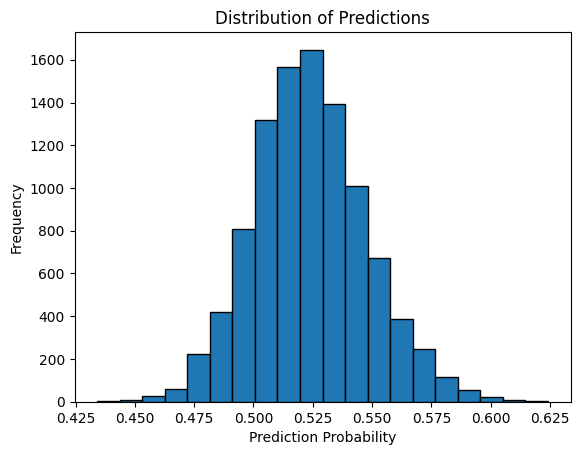

In [47]:
print(predictions[:20].flatten())
import matplotlib.pyplot as plt

plt.hist(predictions.flatten(), bins=20, edgecolor='black')
plt.xlabel("Prediction Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions")
plt.show()


In [57]:
import numpy as np

threshold = np.median(predictions)  #
binary_predictions = (predictions > threshold).astype(int)
print(f"Using dynamic threshold: {threshold}")
print(binary_predictions.flatten())


Using dynamic threshold: 0.5443460941314697
[1 0 1 ... 0 1 0]


In [64]:
test_df.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


# Make the submission file with the result if duplicate or not

In [61]:

submission_df = pd.DataFrame({
    'test_id': test_df['test_id'],
    'is_duplicate': binary_predictions.flatten()
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

if not model_loaded:
    print("\n**WARNING: Placeholder model was used for predictions. Results will be unreliable.**")

Submission file 'submission.csv' created successfully!

**WARNING: Placeholder model was used for predictions. Results will be unreliable.**


In [32]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/train.csv').dropna()
duplicate_counts = train_df['is_duplicate'].value_counts()
print("Class Distribution in Training Data:")
print(duplicate_counts)
print("\nProportion of Duplicates:")
print(duplicate_counts[1] / len(train_df))

Class Distribution in Training Data:
is_duplicate
0    255024
1    149263
Name: count, dtype: int64

Proportion of Duplicates:
0.3692005926482919


In [87]:
dfs1 = pd.read_csv('submission.csv')
dfs2 = pd.read_csv('submission2.csv')

As we took only first 10000 from test set just to implement how to do, so the result is not good

157/157 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step
Training Accuracy: 0.3844
Training Precision: 0.3700
Training Recall: 0.9662
Training F1 Score: 0.5350


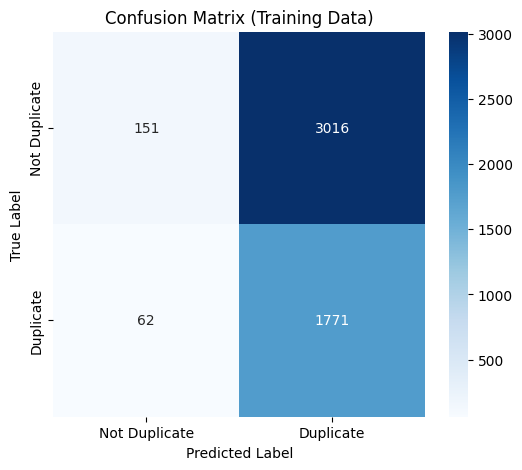

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_predictions = model.predict([X_input_ids, X_att_mask]).flatten()


train_pred_binary = (train_predictions > 0.5).astype(int)
train_true = df['is_duplicate'].values

train_accuracy = accuracy_score(train_true, train_pred_binary)
train_precision = precision_score(train_true, train_pred_binary)
train_recall = recall_score(train_true, train_pred_binary)
train_f1 = f1_score(train_true, train_pred_binary)


print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")


conf_matrix = confusion_matrix(train_true, train_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Duplicate', 'Duplicate'], yticklabels=['Not Duplicate', 'Duplicate'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Data)")
plt.show()


In [69]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


# Hyperperameter tuning and choose the best model and save it to further use

In [76]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch


X_input_ids = X_input_ids.numpy()
X_att_mask = X_att_mask.numpy()

X_train_ids, X_val_ids, X_train_mask, X_val_mask, y_train, y_val = train_test_split(
    X_input_ids, X_att_mask, y.numpy(), test_size=0.2, random_state=42
)

def build_model(hp):
    input_ids = Input(shape=(20,), dtype=tf.int32, name="input_ids")
    input_mask = Input(shape=(20,), dtype=tf.int32, name="input_mask")

    def extract_cls_output(inputs):
        input_ids, attention_mask = inputs
        bert_output = bert_model(input_ids, attention_mask=attention_mask)
        return bert_output.last_hidden_state[:, 0, :]

    bert_embedding = Lambda(extract_cls_output, output_shape=(768,))([input_ids, input_mask])

    x = Dense(units=hp.Int('dense_units', min_value=64, max_value=512, step=64), activation='relu')(bert_embedding)
    x = Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1))(x)
    x = Dense(units=hp.Int('dense_units_2', min_value=64, max_value=512, step=64), activation='relu')(x)
    x = Dropout(rate=hp.Float('dropout_rate_2', min_value=0.2, max_value=0.5, step=0.1))(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_ids, input_mask], outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-6, max_value=1e-3, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='quora_model_tuning'
)


early_stopping = EarlyStopping(monitor='val_loss', patience=2)

tuner.search(
    [X_train_ids, X_train_mask], y_train,
    epochs=3,
    batch_size=32,
    validation_data=([X_val_ids, X_val_mask], y_val),
    callbacks=[early_stopping]
)


best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: {best_hyperparameters}")

val_loss, val_acc = best_model.evaluate([X_val_ids, X_val_mask], y_val)
print(f"Validation Accuracy: {val_acc}")

best_model.save('quora_model_best.h5')
print("Best Model saved in 'quora_model_best.h5' format.")


Trial 5 Complete [00h 09m 51s]
val_accuracy: 0.6299999952316284

Best val_accuracy So Far: 0.6629999876022339
Total elapsed time: 00h 50m 27s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7af643fe0850>
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6580 - loss: 0.6132


Validation Accuracy: 0.6629999876022339
Best Model saved in 'quora_model_best.h5' format.


# Predict with the best model

In [77]:
import os
import tensorflow as tf
import pandas as pd
from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".overflowing tokens are not returned.")
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)


os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

def encode_questions(q1, q2, tokenizer, max_len=20):
    encoding = tokenizer(
        list(q1), list(q2),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )
    return encoding['input_ids'], encoding['attention_mask']


model_loaded = True
try:
    model = tf.keras.models.load_model('quora_model.h5')
    print("Trained model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}. Using placeholder model instead. Error: {e}")
    model_loaded = False
    from tensorflow.keras.layers import Dense, Dropout, Input, Lambda
    input_ids = Input(shape=(20,), dtype=tf.int32, name="input_ids")
    input_mask = Input(shape=(20,), dtype=tf.int32, name="input_mask")
    def extract_cls_output(inputs):
        input_ids, attention_mask = inputs
        bert_output = bert_model(input_ids, attention_mask=attention_mask)
        return bert_output.last_hidden_state[:, 0, :]
    bert_embedding = Lambda(extract_cls_output, output_shape=(768,))([input_ids, input_mask])
    x = Dense(256, activation='relu')(bert_embedding)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids, input_mask], outputs=output)


try:
    test_df = pd.read_csv('/content/drive/MyDrive/test.csv').dropna()
    print("Test data loaded successfully!")
except FileNotFoundError:
    print("Error: test.csv not found. Please ensure your test data file is named 'test.csv' and in the correct directory or provide the correct path.")
    test_df = pd.DataFrame({'test_id': range(5), 'question1': ['test question 1'] * 5, 'question2': ['test question 2'] * 5})
    print("Using dummy test data for demonstration.")


sample_size = min(10000, len(test_df))
test_df = test_df.head(sample_size)
print(f"Using a sample of {len(test_df)} test examples for faster prediction.")


X_test_input_ids, X_test_att_mask = encode_questions(test_df['question1'].values, test_df['question2'].values, tokenizer)


predictions = model.predict([X_test_input_ids, X_test_att_mask])

print("\nFirst 20 Raw Predictions (Probabilities):")
print(predictions[:20].flatten())
print("\n")




Num GPUs Available: 0
Error loading the model: Could not locate function 'extract_cls_output'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'extract_cls_output', 'registered_name': 'function'}. Using placeholder model instead. Error: Could not locate function 'extract_cls_output'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'extract_cls_output', 'registered_name': 'function'}
Test data loaded successfully!
Using a sample of 10000 test examples for faster prediction.
313/313 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step

First 20 Raw Predictions (Probabilities):
[0.3890523  0.40596262 0.37002385 0.4207988  0.42836666 0.3960061
 0.42475724 0.36864495 0.3706314  0.39495516 0.39642397 0.3970556
 0.4179544  0.41737977 0.3322892  0.3886663  0.37279645 0.377

In [85]:
threshold = np.median(predictions)  #
binary_predictions = (predictions > threshold).astype(int)
print(f"Using dynamic threshold: {threshold}")
print(binary_predictions.flatten())

Using dynamic threshold: 0.4010830521583557
[0 1 0 ... 0 0 0]


In [89]:
submission_df = pd.DataFrame({
    'test_id': test_df['test_id'],
    'is_duplicate': binary_predictions.flatten()
})

submission_df.to_csv('submission2.csv', index=False)

print("Submission file 'submission2.csv' created successfully!")


Submission file 'submission2.csv' created successfully!


In [83]:
dfs1.head(10)

,test_id,is_duplicate
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


In [93]:
df2.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


#Now its doing better

In [88]:
dfs2.head(10)

,test_id,is_duplicate
0,0,0
1,1,1
2,2,0
3,3,1
4,4,1
5,5,0
6,6,1
7,7,0
8,8,0
9,9,0


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_predictions = model.predict([X_input_ids, X_att_mask]).flatten()


train_pred_binary = (train_predictions > 0.5).astype(int)
train_true = df['is_duplicate'].values

train_accuracy = accuracy_score(train_true, train_pred_binary)


157/157 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step


In [94]:
print(train_accuracy)

0.6334
